#### NLP 정리 목차
1. 데이터 가져오기
-   1) 파일 open 방식
-   2) 판다스 read_csv() 방식
2. 텍스트 데이터 전처리 : X ( 입력) , Y (레이블 )
-  1) 파이썬 코딩 방식 : 문장 => 단어 => 형태소
-     split('\n' or '\t') , replace('\n', ' ') 등등 정규식 사용방법
-  2) 라이브러리 사용 : nltk.Tokenizer()
3. 텍스트 데이터 벡터화
-  1) Tokenizer를 사용 : fit_on_texts()
-  2) Tokenizer를 사용 : texts_to_sequences()
-  3) pad_sequences ()
4. 모델 구성 및 컴파일하기
-  1) Embedding : 입력 값 이해
-  2) LSTM
-  3) 출력
5. 학습
6. 평가하기 : test 데이터에 대한 데이터 전처리 (앞의 2번과 같은 과정 )
7. 예측하기 - 예측기 만들기 ( 입력 문구에 대한 텍스트 데이터 전처리하기 )

# 1. 데이터 가져오기

0. 라이브러리

In [20]:
# 라이브러리 가져오기
import pandas as pd
import tensorflow as tf
import numpy as np
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt
from nltk.tokenize import word_tokenize

1-1. 파일 오픈

- .txt 방식

In [8]:
# Naver Sentiment Movie Corpus v1.0 다운로드하기
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [12]:
# 상대경로
# with open('filename.txt', 'r') as file:
#     data = file.read()

1-2. 판다스 read_csv () 방식 or read_excel() 방식

In [10]:
# import pandas as pd
#
## 1.상대경로 이용 
##  1) csv 파일 리딩
# data_file = pd.read_csv('./ArticlesApril2018.csv')
##  2) excel 파일 리딩 
# data_file = pd.read_excel(./ArticlesApril2018.xml')
#
## 2. 절대경로 이용
#
## 1) 백슬래시 이용
#    csv_file_path = 'C:\\Users\\YourUsername\\Documents\\your_directory\\your_file.csv'
#    excel_file_path = 'C:\\Users\\YourUsername\\Documents\\your_directory\\your_file.xlsx'
#
##   CSV 파일 읽기
#    data_csv = pd.read_csv(csv_file_path)
##   Excel 파일 읽기
#    data_excel = pd.read_excel(excel_file_path)

## 2) r 사용 예제:
## `r`을 사용하여 백슬래시를 이스케이프 문자로 인식하지 않음
#   csv_file_path = r'C:\Users\YourUsername\Documents\your_directory\your_file.csv'
#   excel_file_path = r'C:\Users\YourUsername\Documents\your_directory\your_file.xlsx'

##   CSV 파일 읽기
#   data_csv = pd.read_csv(csv_file_path)
##   Excel 파일 읽기
#   data_excel = pd.read_excel(excel_file_path)

- 번외_Colab and Google Drive
### if link is
https://drive.google.com/file/d/XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX/view?usp=sharing    

In [11]:
# # 파일 ID를 지정합니다.
# file_id = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

# # 파일의 공유 가능한 링크 URL을 생성합니다.
# file_url = f"https://drive.google.com/uc?id={file_id}"

# # CSV 파일 읽기
# data_file = pd.read_csv(file_url)
    

1-3. 웹크롤링

- Requests 라이브러리를 사용한 웹 스크래핑:

In [15]:
# 라이브러리
import requests
from bs4 import BeautifulSoup

In [ ]:
# url = 'https://example.com/blog-post'
# response = requests.get(url)
# soup = BeautifulSoup(response.text, 'html.parser')
# article_text = soup.find('div', {'class': 'article-content'}).get_text()

- API를 통한 데이터 가져오기:

In [16]:
import requests

In [ ]:
# api_url = 'https://api.example.com/data'
# response = requests.get(api_url)
# data = response.json()  # JSON 응답 데이터 파싱
# text_data = data['text']

- 웹 스크래핑 라이브러리 사용:

In [18]:
## scrapy 라이브러리 다운로드
# !pip install scrapy

  Obtaining dependency information for scrapy from https://files.pythonhosted.org/packages/08/66/22ed9609df4b6d94a66512572a11b35943a6cb36dc268f88ebfbede60be1/Scrapy-2.11.0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.1 MB 8.6 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.1 MB 13.0 MB/s eta 0:00:01
     ------------------------------- -------- 2.5/3.1 MB 17.5 MB/s eta 0:00:01
     ---------------------------------------- 3.1/3.1 MB 18.1 MB/s eta 0:00:00
  Obtaining dependency information for cryptography>=36.0.0 from https://files.pythonhosted.org/packages/86/35/f03a42444866ef7f23134812a05012dcb509418214fb78ec848f28cd14b8/cryptography-41.0.5-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for pyOpenSSL>=21.0.0 from https://files.pythonhosted.org/packages/f0/e2/f8b4f1c67933a4907e52228241f4bd52169f3196b70af04403b29c63238a/pyOpenSSL-23.2.0-p

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
spyder 4.2.5 requires jedi==0.17.2, but you have jedi 0.19.0 which is incompatible.
spyder 4.2.5 requires parso==0.7.0, but you have parso 0.8.3 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import scrapy

In [ ]:
# class MySpider(scrapy.Spider):
#     name = 'my_spider'
#     start_urls = ['https://example.com']
    
#     def parse(self, response):
#         text_data = response.css('p::text').getall()
#         # 데이터 처리 및 추출

# 2. 텍스트 데이터 전처리 : 
# X ( 입력) , Y (레이블 )

In [9]:
# 1. 데이터 읽어 저장하기 : encoding 형식으로 utf-8 을 지정해야합니다.
# path_to_train_file / path_to_test_file 을 open() 해서 read()한후 
# decode(encoding='utf-8') 한 후 train_text / test_text 에 저장합니다.

train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8') # ... your code
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8') # ... your code

print('train text length:', len(train_text),' characters')
print('test  text length:', len(test_text),' characters')
# print(train_text[:5])
print(train_text[:300])

train text length: 6937271  characters
test  text length: 2318260  characters
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


- #### 2-1. 데이터정제 - X값 추출

In [21]:
# X값 추출 및 train_text_X 리스트에 저장
# train_text를 줄바꿈 ('\n')으로 나누고, 각 줄을 탭('\t') 문자로 나눈 다음, 해당 줄에서 탭의 개수가 1개 이상인 줄을 선택합니다.
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0 ]
# train_text를 줄바꿈 : \n
# 각 줄을 문자로 나눔 : \t
# 문자로 나뉜 train_text의 탭의 갯수가 1개 이상인 줄을 선택

# train_text_X 리스트의 길이를 출력합니다.
print(len(train_text_X)) 

# train_text_X 리스트에서 처음 5개 항목을 출력합니다.
train_text_X[:5]

150000


['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

- #### 2-2. 데이터 정제 - Y레이블 추출

In [22]:
# Y 레이블 추출합니다. - X 와 같은 방식으로 
# 각 문장을 '\n'으로 분리 -> 헤더제외 -> '
# -> \t'으로 분리 -> 마지막 문자 정수로 변환하여 2차원으로 변환
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


- #### np.array를 쓰는 이유
- Numpy 배열로 데이터를 저장하기 위함
- #### int()를 쓰는 이유
- 1) 레이블 값이 현재 문자열(string) 형태
- 2) 레이블 값을 정수로 변환
- 3) 정수로 변환하면 모델 학습 및 평가에 활용

#### Output 해설
1. (150000, 1)은 train_Y 배열의 형태
- 1) 150,000개의 데이터 포인트(영화 리뷰) 존재
- 2) 각 데이터 포인트가 1차원 배열(스칼라)의 형태

2. (50000, 1)은 test_Y 배열의 형태
- 1) 50,000개의 데이터 포인트(영화 리뷰)존재 
- 2) 각 데이터 포인트가 1차원 배열(스칼라)의 형태를 가짐을 의미합니다.

- 3. train_Y의 첫 번째 데이터 포인트는 0으로 레이블링
- 두 번째 데이터 포인트는 1로 레이블링 -> 이진분류
- #### 레이블링 형태
- 긍정적인 영화 리뷰(1)
- 부정적인 영화 리뷰(0)

- #### 2-3. 텍스트전처리

- #### 2-3-1)  문장 => 단어 => 형태소
- split('\n' or '\t') , replace('\n', ' ') 등등 정규식 사용

In [24]:
import re
def clean_str(string):    
    string = re.sub(r"[^가-힝A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [clean_str(sentence) for sentence in train_text_X] # ... code here
train_text_X[:5]

['아 더빙 진짜 짜증나네요 목소리',
 '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다 평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화 ! 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

In [29]:
# train_text_X 에 대해 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X] # ... code here
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠포스터보고', '초딩영화줄오버연기조차', '가볍지', '않구나'], ['너무재밓었다그래서보는것을추천한다']]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠포스터보고', '초딩영화줄오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다']]

- #### 2-4. 전처리된 데이터파일 시각화로 확인해보기

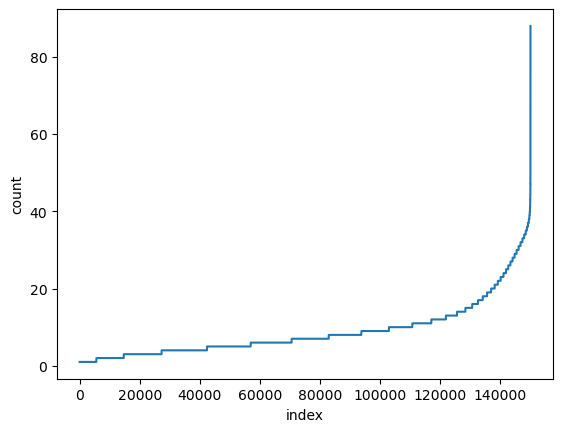

142587


In [30]:
# 150000개 문장의 단어 길이 확인
import matplotlib.pyplot as plt
# sentences 에 대해 각 문장의 길이를 구해를 구해  sentence_len 저장하기
sentence_len = [len(sentence) for sentence in sentences] # ... code here
# sentence_len 정렬하기
sentence_len.sort()  # ... code here
# sentence_len 으로 plot 하기
plt.plot(sentence_len) # ... code here
plt.xlabel('index')
plt.ylabel('count')
plt.show()

# sentence_len 길이가 25개 이하인 것 합계구하고 출력하기
print(sum([int(l<=25) for l in sentence_len]))
# 15 만개 문장 중 단어 갯수가 25개 이하인 문장의 수가 142590개이다, 25를 sequence_length로 사용

#### 2-2. 라이브러리 사용 : nltk.Tokenizer()

In [32]:
# 라이브러리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
max_words = 20000
max_length = 25
# 가장 빈도가 높은 20000개(max_words)의 단어들만 사용하여 토큰화 인스턴스 생성하기 : tokenizer 
tokenizer = Tokenizer(num_words=max_words) 
# 빈도수가 높은 20000개 단어만 사용하여 숫자로 반환하고 나머지는 공백으로 반환

# 단어(sentences) 인덱스 구축
tokenizer.fit_on_texts(sentences)

# 문자열을 정수 인덱스의 리스트로 변환
sequences = tokenizer.texts_to_sequences(sentences)

# 시퀀스 패딩 : 벡터 표현을 얻음, padding = 'post' - 문장의 뒤부분으로 0을 패딩
train_X = pad_sequences(sequences, padding = 'post') 

train_X[:5]

array([[   26,   898,     8,  6750,  1094,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [  591,  5848,  6751,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     

3. 텍스트 데이터 벡터화

3-1. Tokenizer를 사용 : fit_on_texts()

3-2. Tokenizer를 사용 : texts_to_sequences()


3-3. pad_sequences ()

# 4. 모델 구성 및 컴파일하기

4-1. Embedding : 입력 값 이해

4-2. LSTM

4-3. 출력

# 5. 학습

# 6. 평가하기 : test 데이터에 대한 데이터 전처리 (앞의 2번과 같은 과정)

# 7. 예측하기 - 예측기 만들기 ( 입력 문구에 대한 텍스트 데이터 전처리하기)